In [28]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import skimage.io as io

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import pylab
from tqdm.auto import tqdm


import cv2
import skimage

In [68]:
images = np.load("image.npy")
image_labels = np.load("image_category.npy")
hog = np.load("hog.npy")

In [70]:
images = images.reshape(2966, 128*128)
hog = hog.reshape(2966, 128*128)

In [123]:
tsne = TSNE(perplexity=7).fit_transform(hog)
pca = PCA(n_components=2).fit_transform(hog)

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [126]:
def pca_tsne_feature_plot(feature, title, image_labels):
    tsne = TSNE(perplexity=7).fit_transform(feature)
    pca = PCA(n_components=2).fit_transform(feature)
    
    plt.figure(figsize=(10, 10))
    plt.title(title[0])
    plt.scatter(pca[:, 0], pca[:, 1], c=image_labels, cmap="viridis")
    plt.savefig(f"./281 Final Report/{title[0]}.png")
    
    plt.figure(figsize=(10, 10))
    plt.title(title[1])
    plt.scatter(tsne[:, 0], tsne[:, 1], c=image_labels, cmap="viridis")
    plt.savefig(f"./281 Final Report/{title[1]}.png")

/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/grantwilson/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


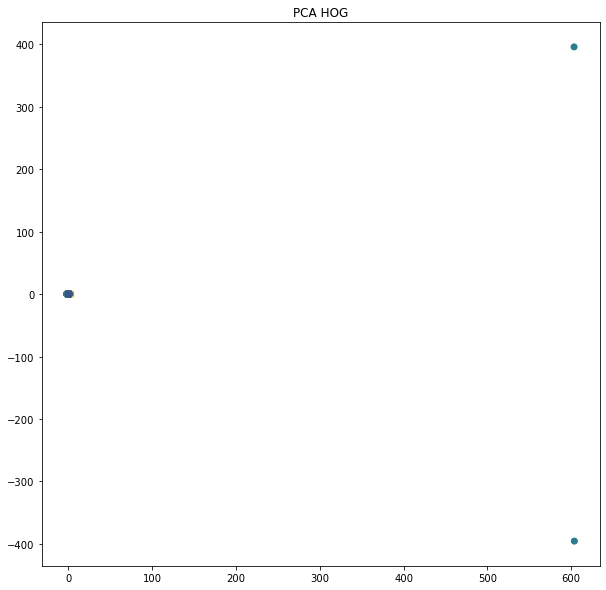

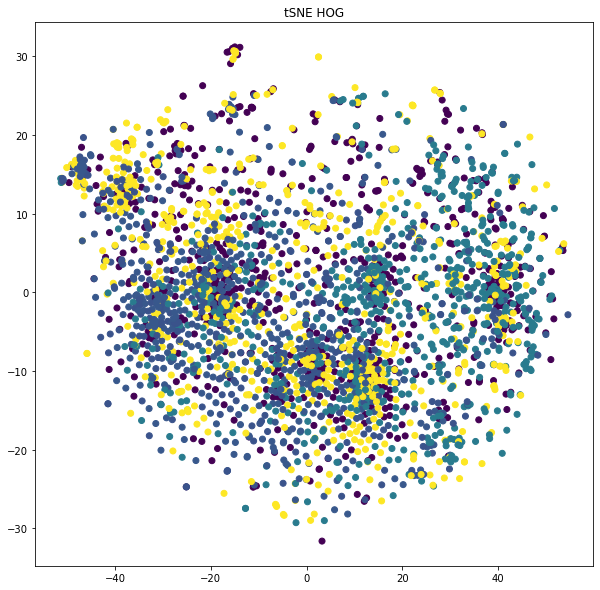

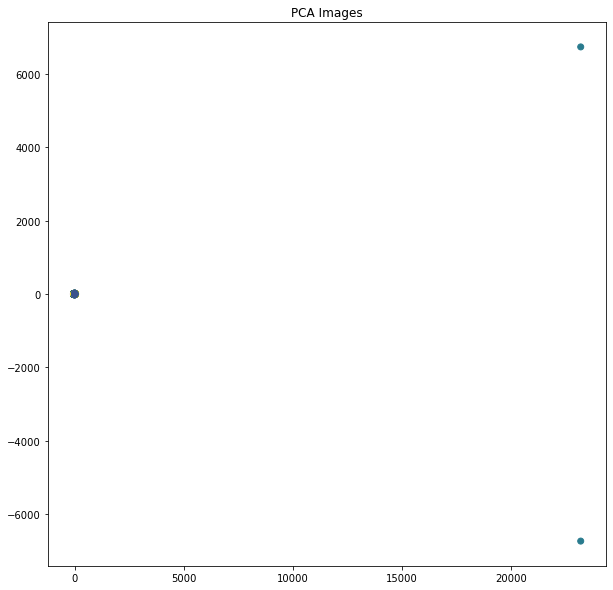

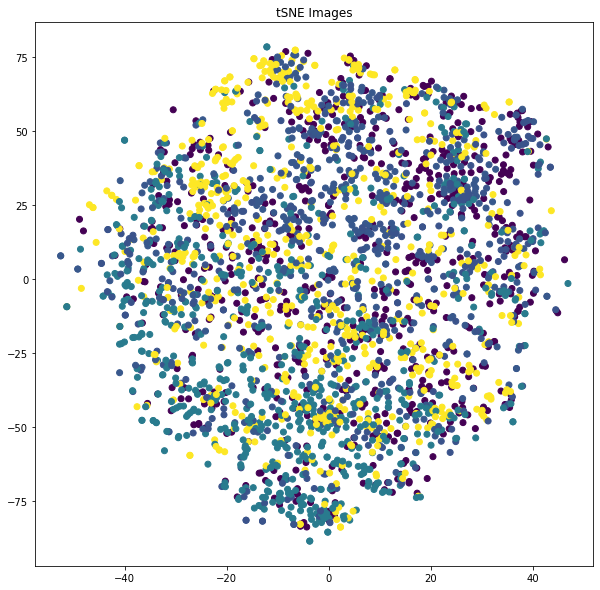

In [127]:
pca_tsne_feature_plot(hog, ["PCA HOG", "tSNE HOG"], image_labels)
pca_tsne_feature_plot(images, ["PCA Images", "tSNE Images"], image_labels)
